## Netflix Data Trend Analyses

**About this Dataset:**
 Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [10, 5]
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
# load data set and analyze the first five rows of data set
data = pd.read_csv('/content/archive (6).zip')

In [ ]:
data.head()

In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## Exploratory Data Analysis:

The datasframe contains 8807 rows and 12 columns

In [31]:
data.shape

(8807, 12)

Let's display the concise summary of the dataframe

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Check missing values:

In [33]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The missing value are:

Column    - No.of Missing Values

director   -  2634

cast        -  825

country      - 831

Drop null values to handle missing values

In [34]:
data = data.dropna()
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Checkout any duplicate rows in the dataframe

In [35]:
duplicate_rows = data[data.duplicated()]
duplicate_rows.shape

(0, 12)

Rating of movies:

In [36]:
df_movie = data[data["type"] == 'Movie']
movie_rating = df_movie['rating'].value_counts().reset_index(name='counts')
print("Rating of movies:\n", movie_rating)

Rating of movies:
       rating  counts
0      TV-MA    1741
1      TV-14    1177
2          R     778
3      PG-13     470
4      TV-PG     416
5         PG     275
6       TV-G      81
7       TV-Y      71
8      TV-Y7      70
9         NR      58
10         G      40
11  TV-Y7-FV       3
12        UR       3
13     NC-17       2


## Data Visualization:

Distribution of content rating:

In [37]:
fig = px.pie(movie_rating, names='rating', values = 'counts', color_discrete_sequence = px.colors.sequential.Agsunset, height=500, width=700)
fig.update_layout(title="Distribution of Netflix content rating ")
fig.show()

TV shows rating:

In [38]:
df_TVshows = data[data["type"] == 'TV Show']
TVshows_rating = df_TVshows['rating'].value_counts().reset_index(name='counts')
print("Rating of TV shows:\n", TVshows_rating)

Rating of TV shows:
   rating  counts
0  TV-MA      81
1  TV-14      37
2  TV-PG      15
3  TV-Y7       6
4   TV-Y       5
5   TV-G       3


Most of the TV shows are rated as TV-MA and TV-14. Let's visualize the distribution of TV show ratings.

In [39]:
fig = px.pie(TVshows_rating, names='rating', values = 'counts', height=500, width=700)
fig.update_layout(title="Distribution of Netflix content rating ")
fig.show()

Analyze the trend over the years

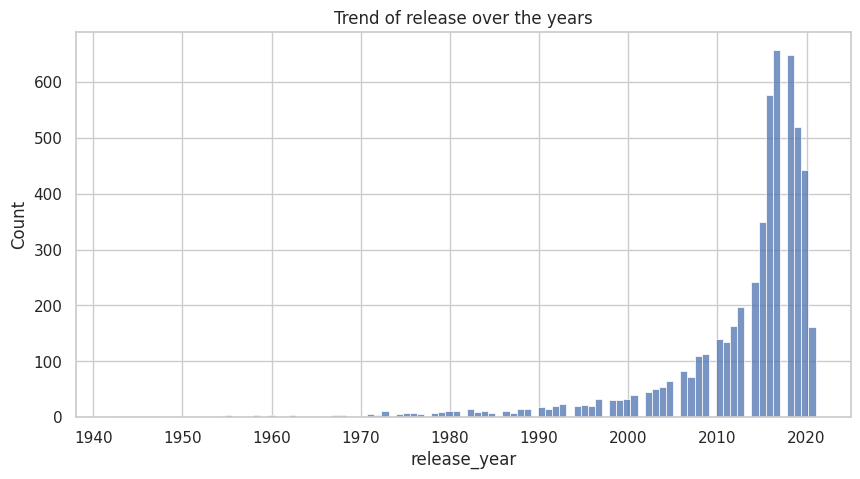

In [41]:
sns.histplot(data['release_year'], kde=False)
plt.title("Trend of release over the years")
plt.show()

Top ten countries with most content:

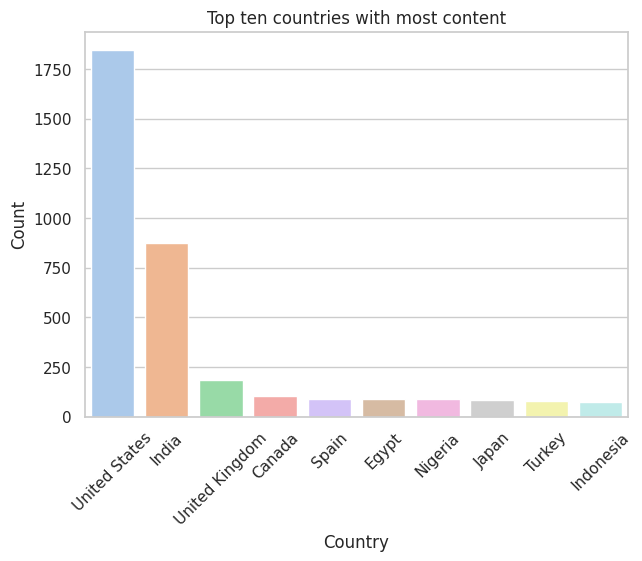

In [42]:
top10countries = data['country'].value_counts().head(10)

fig = plt.figure(figsize=(7, 5))
sns.barplot(x=top10countries.index, y=top10countries.values, palette = 'pastel')
plt.title("Top ten countries with most content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Identify and distribute most common genres:

In [43]:
#identify the most common genre
all_genres = ",".join(data['listed_in']).split(",")
top_genre = pd.Series(all_genres).value_counts().reset_index(name="count")

Let's visualize top genres

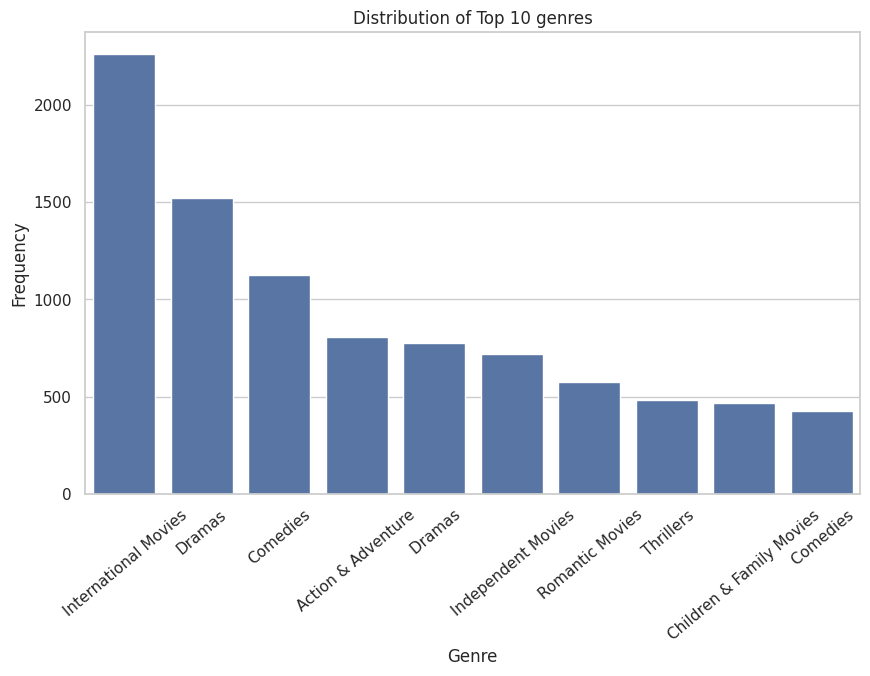

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='count', data=top_genre.head(10))
plt.title('Distribution of Top 10 genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=40)
plt.show()

Top ten movie director:

In [45]:
top10_movie_director = data['director'][data['type']=='Movie'].value_counts().head(10).reset_index(name='counts')
print(top10_movie_director)

                 director  counts
0  Raúl Campos, Jan Suter      18
1               Jay Karas      14
2            Marcus Raboy      14
3     Cathy Garcia-Molina      13
4             Jay Chapman      12
5         Youssef Chahine      12
6         Martin Scorsese      12
7        Steven Spielberg      11
8        Don Michael Paul      10
9            David Dhawan       9


Top ten movies Directors visualization using Barplot

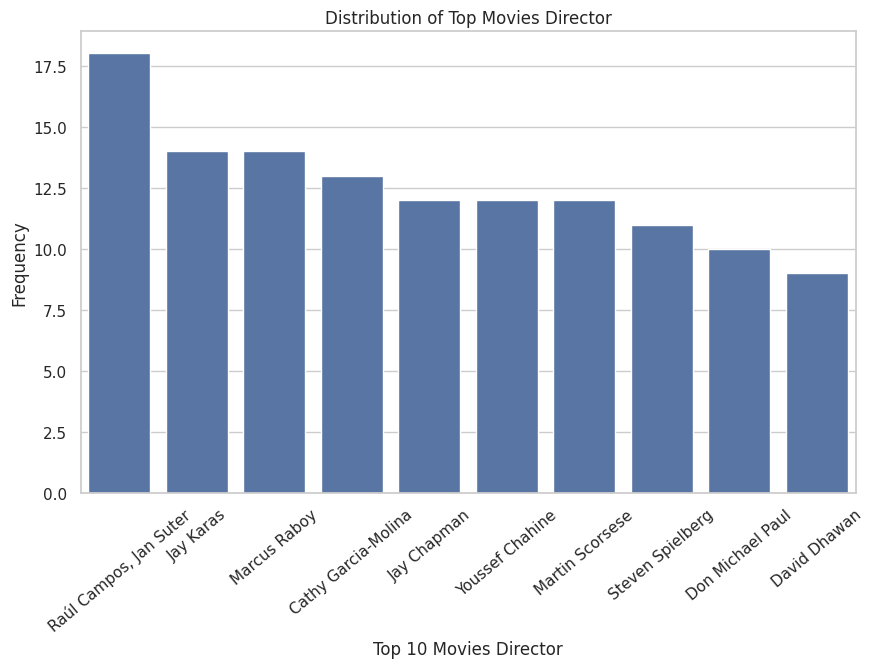

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='director', y='counts', data=top10_movie_director)
plt.title('Distribution of Top Movies Director')
plt.xlabel('Top 10 Movies Director')
plt.ylabel('Frequency')
plt.xticks(rotation=40)
plt.show()

Top ten Tv shows Directors visualization using Barplot

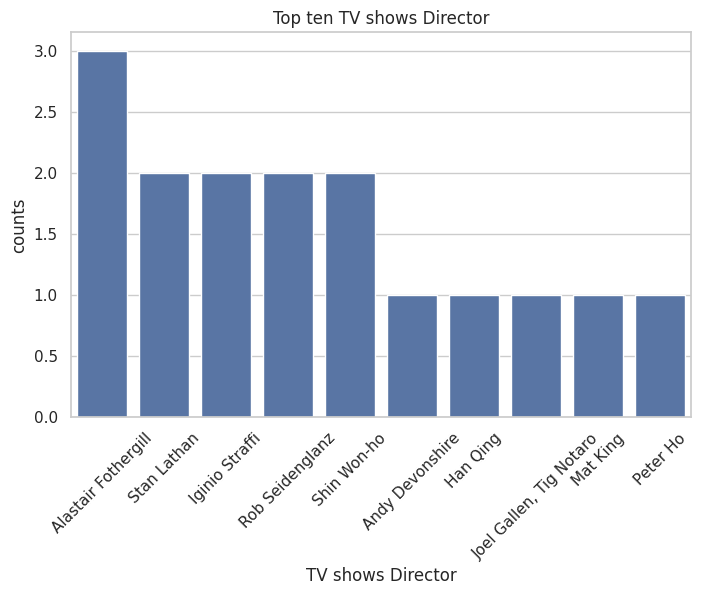

In [47]:
top10_tvshows_directors = data['director'][data['type']=='TV Show'].value_counts().head(10).reset_index(name='counts')
plt.figure(figsize=(8,5))
plots = sns.barplot(x='director', y='counts', data=top10_tvshows_directors)
plt.title("Top ten TV shows Director")
plt.xlabel('TV shows Director')
plt.xticks(rotation=45)
plt.show()

Let's analyze the content produced on Netflix according to the years


*   Separate the type and release_year column  

*   Rename and concatenate the columns to make a new data frame

*   Plotting the new_data to the line plot


In [48]:
data = data[['type', 'release_year']]
data = data.rename(columns = {'type': 'Type', 'release_year':'Release_Year'})
new_data = data.groupby(['Release_Year', 'Type']).size().reset_index(name="Count")

plot = px.line(new_data, x='Release_Year', y='Count', color='Type', title="Trend of Content Produced on Netflix Yearly")
plot.show()

This plot shows the number of movies released each year increasing from 1993 to 2017, followed by a slight decrease. The number of TV shows slightly increases and then decreases.